# Titanic Challenge

<p align="center"> 
<img src="./Img/titanic.jpg">
</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing Train Dataset

train = pd.read_csv('./Files/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Importing Test Dataset

test = pd.read_csv('./Files/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
evaluation = pd.read_csv('./Files/gender_submission.csv')
evaluation.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
y_test = evaluation['Survived']

### Finding out more about Train CSV

#### Variable Notes

__pclass:__ A proxy for socio-economic status (SES)

    1st = Upper
    2nd = Middle
    3rd = Lower

__age:__ Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp:__ # of siblings / spouses aboard the Titanic. The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

__parch:__ # of parents / children aboard the Titanic. The dataset defines family relations in this way...

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

__embarked:__  Port of Embarkation.
- C = Cherbourg
- Q = Queenstown
- S = Southampton

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
serie = train['Embarked']
serie.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [12]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


__Don't Worry! On Internet you can search all you need!!!__

- [Stone, Mrs. George Nelson (Martha Evelyn)](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) - Embarked at Southampton
- [Icard, Miss. Amelie](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) - Embarked at Southampton


In [13]:
train.loc[61,'Embarked'] = 'S'
train.loc[829,'Embarked'] = 'S'

In [14]:
# Solved

train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
def male(x):
    if x == 'male':
        return 1
    else:
        return 0
def female(x):
    if x == 'female':
        return 1
    else:
        return 0

In [16]:
# Binarize Genre in Train and Test

train['genre_male'] = train['Sex'].apply(male)
train['genre_female'] = train['Sex'].apply(female)
test['genre_male'] = test['Sex'].apply(male)
test['genre_female'] = test['Sex'].apply(female)

In [17]:
# Binarize Pclass in Train and Test

train['Pclass_1'] = train['Pclass'].apply(lambda x: 1 if x == 1 else 0)
train['Pclass_2'] = train['Pclass'].apply(lambda x: 1 if x == 2 else 0)
train['Pclass_3'] = train['Pclass'].apply(lambda x: 1 if x == 3 else 0)
test['Pclass_1'] = test['Pclass'].apply(lambda x: 1 if x == 1 else 0)
test['Pclass_2'] = test['Pclass'].apply(lambda x: 1 if x == 2 else 0)
test['Pclass_3'] = test['Pclass'].apply(lambda x: 1 if x == 3 else 0)

In [18]:
# Binarize Embarked in Train and Test

train['Embarked_S'] = train['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
train['Embarked_C'] = train['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
train['Embarked_Q'] = train['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
test['Embarked_S'] = test['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
test['Embarked_C'] = test['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
test['Embarked_Q'] = test['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,genre_male,genre_female,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1,1,0,0


In [20]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,genre_male,genre_female,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Embarked_C,Embarked_Q
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.042939,0.034303,-0.000086,-0.029486,0.022204,-0.001205,-0.033606
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.543351,0.285904,0.093349,-0.322308,-0.149683,0.168240,0.003650
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.131900,-0.885924,-0.188432,0.916673,0.074053,-0.243292,0.221009
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.093254,0.348941,0.006954,-0.312271,-0.023233,0.036261,-0.022405
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,0.114631,-0.054582,-0.055932,0.092548,0.068734,-0.059528,-0.026354
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,0.245489,-0.017633,-0.000734,0.015790,0.060814,-0.011069,-0.081228
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.182333,0.591711,-0.118557,-0.413333,-0.162184,0.269335,-0.117216
genre_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-1.000000,-0.098013,-0.064746,0.137143,0.119224,-0.082853,-0.074115
genre_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,-1.000000,1.000000,0.098013,0.064746,-0.137143,-0.119224,0.082853,0.074115
Pclass_1,0.034303,0.285904,-0.885924,0.348941,-0.054582,-0.017633,0.591711,-0.098013,0.098013,1.000000,-0.288585,-0.626738,-0.161921,0.296423,-0.155342


### Feature Columns and Target Data

In [21]:
feature_cols = ['Pclass_1','Pclass_2','Pclass_3','genre_male','genre_female','Embarked_S','Embarked_C','Embarked_Q','SibSp','Parch','Fare']
X_train = train[feature_cols]
y_train = train['Survived']

In [22]:
print(X_train.shape,y_train.shape)

(891, 11) (891,)


In [22]:
# 549 People who didn't survive and 342 People who survived

y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Scikit-Learn Model

- Type of Problem: __Classification__ Problem
- Types of classification __algorithms__ in Machine Learning:
    1. Linear Classifiers: Logistic Regression, Naive Bayes Classifier
    2. Support Vector Machines
    3. Decision Trees
    4. Boosted Trees
    5. Random Forest
    6. Neural Networks
    7. Nearest Neighbor

### Logistic Regression

#### Fitting the model

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Test Dataset

In [25]:
X_test = test[feature_cols]
X_test.head()

,Pclass_1,Pclass_2,Pclass_3,genre_male,genre_female,Embarked_S,Embarked_C,Embarked_Q,SibSp,Parch,Fare
0,0,0,1,1,0,0,0,1,0,0,7.8292
1,0,0,1,0,1,1,0,0,1,0,7.0000
2,0,1,0,1,0,0,0,1,0,0,9.6875
3,0,0,1,1,0,1,0,0,0,0,8.6625
4,0,0,1,0,1,1,0,0,1,1,12.2875


In [25]:
# Look at Fare! There is a miss value!
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass_1        418 non-null int64
Pclass_2        418 non-null int64
Pclass_3        418 non-null int64
genre_male      418 non-null int64
genre_female    418 non-null int64
Embarked_S      418 non-null int64
Embarked_C      418 non-null int64
Embarked_Q      418 non-null int64
SibSp           418 non-null int64
Parch           418 non-null int64
Fare            417 non-null float64
dtypes: float64(1), int64(10)
memory usage: 36.0 KB


In [26]:
X_test[X_test['Fare'].isnull()]

,Pclass_1,Pclass_2,Pclass_3,genre_male,genre_female,Embarked_S,Embarked_C,Embarked_Q,SibSp,Parch,Fare
152,0,0,1,1,0,1,0,0,0,0,NaN


In [27]:
X_test[(X_test['Pclass_3'] == 1) & (X_test['genre_male'] == 1) & (X_test['SibSp'] == 0) & (X_test['Parch'] == 0) & (X_test['Embarked_S'] == 1)]['Fare'].mean()

9.096774666666667

In [28]:
X_test['Fare'].fillna(9.0967,inplace = True)

/home/dsc/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
# Fixed it

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass_1        418 non-null int64
Pclass_2        418 non-null int64
Pclass_3        418 non-null int64
genre_male      418 non-null int64
genre_female    418 non-null int64
Embarked_S      418 non-null int64
Embarked_C      418 non-null int64
Embarked_Q      418 non-null int64
SibSp           418 non-null int64
Parch           418 non-null int64
Fare            418 non-null float64
dtypes: float64(1), int64(10)
memory usage: 36.0 KB


#### Predicting values

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
len(y_pred)

418

In [32]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# Construimos un DataFrame
# Diccionarios son unordered por esa razón ponemos un set_index con passengerid

titanic_kaggle = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': y_pred}).set_index('PassengerId')

In [34]:
titanic_kaggle.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


#### Evaluating the model

In [35]:
#Guardar el df en un archivo CSV

titanic_kaggle.to_csv('./Submissions/sub_Titanic_LogRegV2.csv')

### KNN KNeighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
param_grid=dict(n_neighbors=range(1,31),weights=['uniform','distance'])
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [37]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.736251,0.060016,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.736251,0.060016,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.735129,0.064458,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.749719,0.064141,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.757576,0.055901,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.766554,0.043361,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.763187,0.037899,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.794613,0.030476,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.769921,0.041011,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.792368,0.027632,"{'n_neighbors': 5, 'weights': 'distance'}"


In [38]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7968574635241302
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')


In [39]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [40]:
y_pred = knn.predict(X_test)

In [41]:
# Construimos un DataFrame
# Diccionarios son unordered por esa razón ponemos un set_index con passengerid

titanic_kaggle = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': y_pred}).set_index('PassengerId')

In [42]:
#Guardar el df en un archivo CSV

#titanic_kaggle.to_csv('./Submissions/sub_Titanic_KNN8DIST_V2.csv')

### Support Vector Machine

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_pred = svc.predict(X_test)

In [45]:
# Construimos un DataFrame
# Diccionarios son unordered por esa razón ponemos un set_index con passengerid

titanic_kaggle = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': y_pred}).set_index('PassengerId')

In [46]:
titanic_kaggle.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [48]:
#Guardar el df en un archivo CSV

#titanic_kaggle.to_csv('./Submissions/sub_Titanic_SVC_V2.csv')

### XGBoost

In [23]:
from xgboost import XGBClassifier

In [33]:
xgb = XGBClassifier(learning_rate= 0.01,n_estimators= 10 ,max_depth= 3,subsample = 0.8,colsample_bytree = 1,gamma = 1,seed = 45)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgb.fit(X_train, y_train,early_stopping_rounds=10 ,eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.861284	validation_0-error:0.190797	validation_1-auc:0.989983	validation_1-error:0.011962
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-auc:0.861071	validation_0-error:0.189675	validation_1-auc:0.985136	validation_1-error:0.014354
[2]	validation_0-auc:0.859513	validation_0-error:0.189675	validation_1-auc:0.987361	validation_1-error:0.014354
[3]	validation_0-auc:0.859447	validation_0-error:0.189675	validation_1-auc:0.985581	validation_1-error:0.014354
[4]	validation_0-auc:0.859798	validation_0-error:0.189675	validation_1-auc:0.98516	validation_1-error:0.014354
[5]	validation_0-auc:0.859937	validation_0-error:0.189675	validation_1-auc:0.987584	validation_1-error:0.014354
[6]	validation_0-auc:0.862312	validation_0-error:0.189675	validation_1-auc:0.987584	validation_1-error:0.014354
[7]	validation_0-auc:0.864749	validation_0-error:0.18967

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=45, silent=True,
       subsample=0.8)

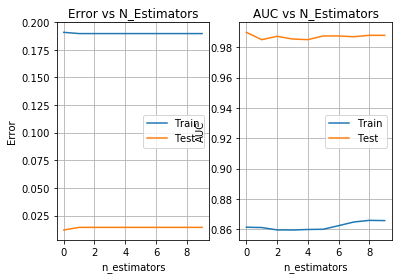

In [34]:
# Optimising N_ESTIMATOR

results = xgb.evals_result()

fig = plt.figure()
plt.subplot(1,2,1)
plt.plot(results['validation_0']['error'],label='Train')
plt.plot(results['validation_1']['error'],label='Test')
plt.title('Error vs N_Estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results['validation_0']['auc'],label='Train')
plt.plot(results['validation_1']['auc'],label='Test')
plt.title('AUC vs N_Estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC');
plt.legend()
plt.grid(True)

In [35]:
y_pred = xgb.predict(X_test)

In [37]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9880382775119617

In [31]:
titanic_kaggle = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': y_pred}).set_index('PassengerId')

In [32]:
titanic_kaggle.to_csv('./Submissions/sub_Titanic_XGBoost.csv')